<a href="https://colab.research.google.com/github/caiocmello/Introduction-to-SA-Training-CAIS/blob/main/session_1/Session1_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src='https://drive.google.com/uc?id=1FzW9bN0SDepyn5pD-BZIP_9VewVmJWya'></center>

#Workshop: **Introduction to Sentiment Analysis: Potentials and limitations**

In [ ]:
variable = 'Hello World!'
print(variable)

#**Session 1:** What's sentiment analysis?


### Installation

Before starting this session, we need to install some packages that will be necessary to run the entire notebook.

In [ ]:
# Run this cell to install all the packages and requirements

!pip install asent
!python -m spacy download en_core_web_sm en_core_web_trf
!pip install xformers accelerate sentencepiece transformers[sentencepiece]
!pip install shap
!pip install lime vaderSentiment
!pip install tokenizers==0.19.1 transformers==4.43.0

2023-07-04 13:04:18.330787: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Now, we need to restart the notebook, so the packages installed will be able to run.

To restart the notebook, go to the menu on the top of the screen and click on ```Runtime``` and go to  ```Restart runtime```.

Take a look at the screenshot below to find the button.


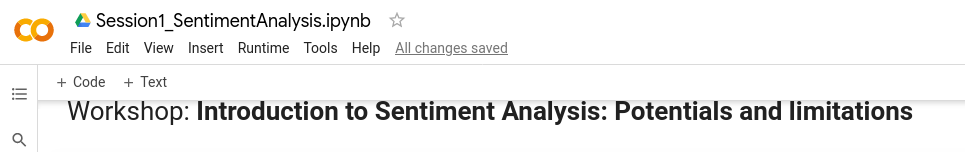

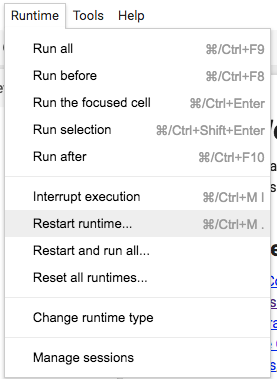

# 1. Sentiment Analysis


### **What's sentiment analysis**

[Sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) (also known as opinion mining or emotion AI) is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information.


1.   I *dislike* old cabin cruisers. ```Negative```
2.   I *like* tea ```Positive```




Sentiment quantification can have various formats:



    Polarity of the text: positive, negative, or neutral
    Numeric scores of positive and negative content
    Labels of emotions in text: e.g. Joy, Anger, Sadness, Disgust, Surprise…


### **How's it been developed?**




**Customers' feedback on products for training models**

> Fang, X., Zhan, J. Sentiment analysis using product review data. Journal of Big Data 2, 5 (2015). https://doi.org/10.1186/s40537-015-0015-2

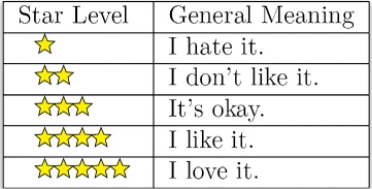


**Sentiment dictionaries**

Dictionary-based sentiment analysis works by comparing the words in a text or corpus with pre-established dictionaries of words. These dictionaries could be based around positive/negative words or other queries such as professional/casual language.

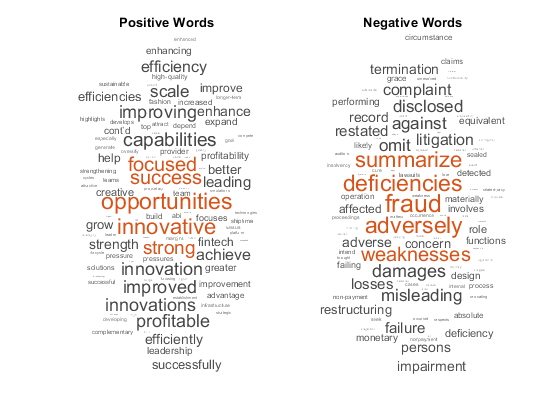

**Sentiment annotation: training a machine**

To teach a machine how to recognise sentiment, humans can annotate words, sentences or documents using tags, such as 'positive', 'negative' and 'neutral'. The algorithm will then be able to learn patterns and recognise sentiment in other texts.

In the image below, you can see an annotation platform, where users can collaborate to enrich the training data.

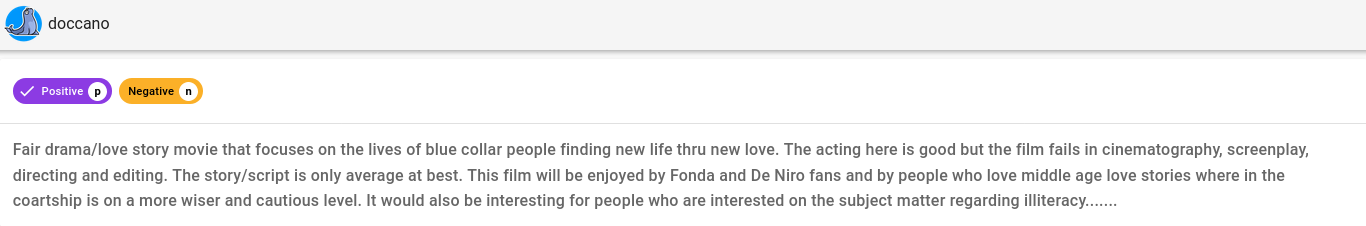

### **Applications in research**

> The internet is where consumers talk about brands, products, services, share their experiences and recommendations. Social platforms, product reviews, blog posts, and discussion forums are boiling with opinions and comments that, if collected and analysed, are a source of business information.

Use of sentiment analysis:

* Brand reputation management

* Customer feedback

* Market research

* Crisis prevention

* Politics

**Sentiment analysis in the media**

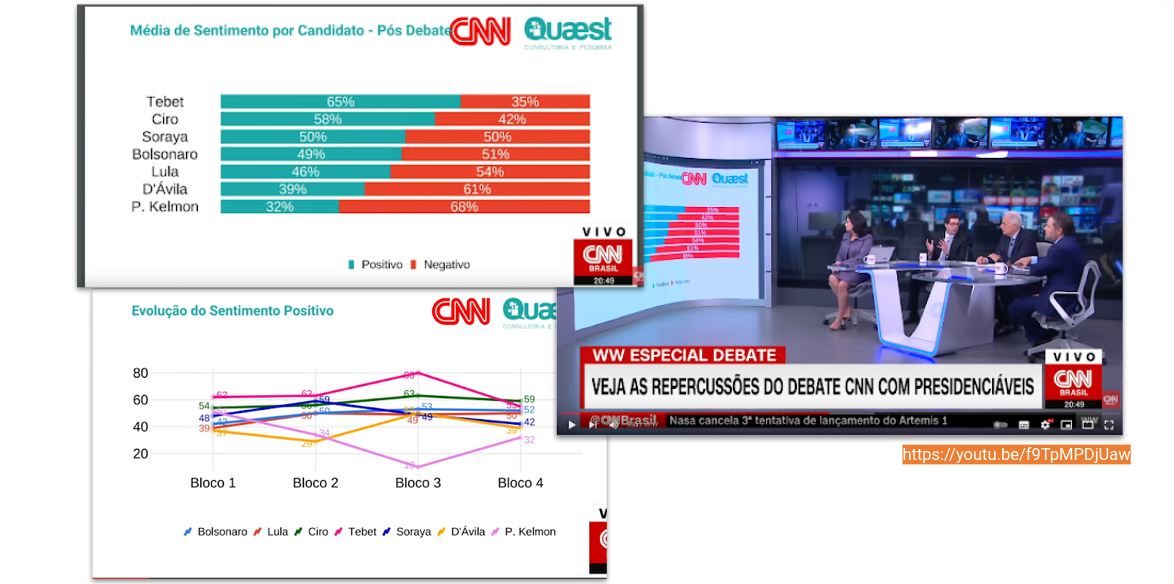

**Exhibition '[Visualising Victorian News](https://www.bl.uk/events/visualising-victorian-news)', British Library (2022)**

> Designer: Ciaran Hughes https://www.ciaranhughes.design/
Data Source: British Library 19th-century newspapers & BR Mitchell, Abstract of British Historical Statistics (Cambridge University Press, 2011)
Research: Living with Machines project - Daniel Wilson & Mariona Coll Ardanuy (Alan Turing) and Yann Ryan (Queen Mary, University of London). Curator: Luke McKernan


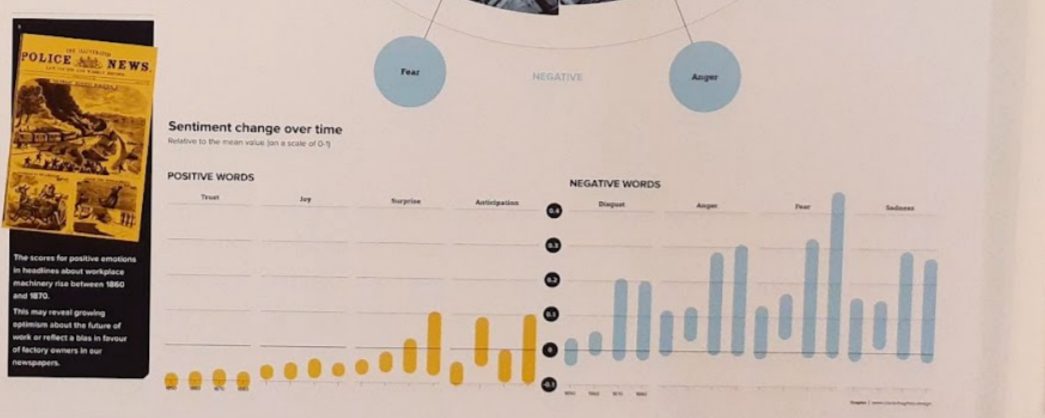

### **Hands-on: Classifying text using Asent**

[Asent](https://github.com/KennethEnevoldsen/asent) is a rule-based sentiment analysis library for Python.

> Rule-based approaches classify text into organized groups by using a set of handcrafted linguistic rules.

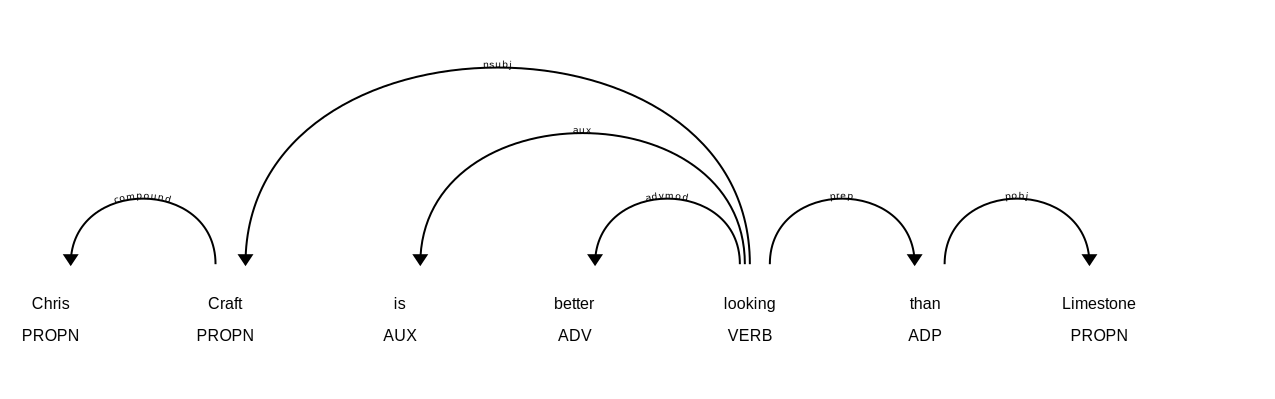

In [ ]:
#@title Example of linguistic rules

import spacy
from spacy import displacy
text = "Chris Craft is better looking than Limestone" #@param {type:"string"}
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

from IPython.display import SVG, display
def show_svg(image):
    display(SVG(image))

show_svg(displacy.render(doc, style="dep"))

In [ ]:
#@title Let's try a sentiment classifier now
#@markdown Run this cell to see the sentiment classification for this phrase:
text = "I hate coffee" #@param {type:"string"}

# text = 'I am not very happy, but I am also not especially sad'

import spacy
import asent
from IPython.display import SVG, display

# load spacy pipeline
nlp = spacy.blank('en')
nlp.add_pipe('sentencizer')

# add the rule-based sentiment model
nlp.add_pipe('asent_en_v1')

# try an example
# text = 'I am not very happy, but I am also not especially sad'
doc = nlp(text)

# print polarity of document, scaled to be between -1, and 1
print(doc._.polarity)
# neg=0.0 neu=0.631 pos=0.369 compound=0.7526

# Naturally, a simple score can be quite unsatisfying, thus Asent implements a series of visualizer to interpret the results:
SVG(asent.visualize(doc, style='prediction'))
 # or



neg=0.649 neu=0.351 pos=0.0 compound=-0.5719


In [ ]:
#@title What if the sentence becomes more complex?
#@markdown Let's try a different sentence now. Copy and paste the following sentence into the box and run to see the results:
#@markdown <br>
#@markdown >**I am not very happy, but I am also not especially sad**
text = "I am not very happy, but I am also not especially sad" #@param {type:"string"}

doc = nlp(text)

# print polarity of document, scaled to be between -1, and 1
print(doc._.polarity)
# neg=0.0 neu=0.631 pos=0.369 compound=0.7526

# Naturally, a simple score can be quite unsatisfying, thus Asent implements a series of visualizer to interpret the results:
SVG(asent.visualize(doc, style='prediction'))
 # or

neg=0.0 neu=0.631 pos=0.369 compound=0.7526


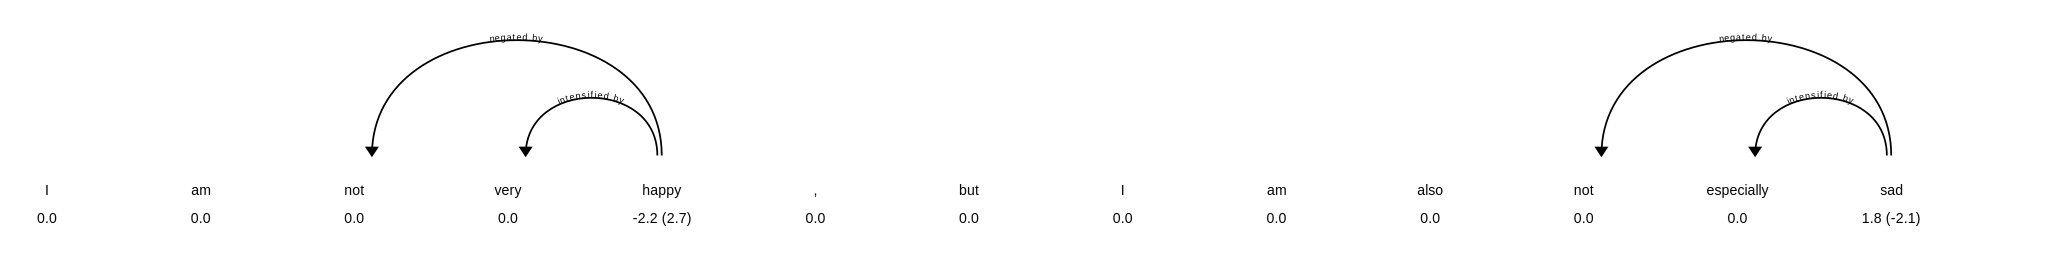

In [ ]:
# Complex syntax: negation & intensifiers

SVG(asent.visualize(doc[:], style='analysis'))

In [ ]:
#@title Now it's your turn! Try some sentences, see your results and share with us :)

text = "" #@param {type:"string"}

doc = nlp(text)

# print polarity of document, scaled to be between -1, and 1
print(doc._.polarity)
# neg=0.0 neu=0.631 pos=0.369 compound=0.7526

# Naturally, a simple score can be quite unsatisfying, thus Asent implements a series of visualizer to interpret the results:
SVG(asent.visualize(doc, style='prediction'))
 # or

In [ ]:
#@title Sentiment analysis is highly context-specific
#@markdown The example below shows how the use of SA can be tricky. It's a tweet, where the user mentions the name of a song and uses a slang. The results are misinterpreted by the algorithm, which reads the sentence as ```negative```.
#@markdown <br>
#@markdown > Rihanna opening the #SuperBowl with "Bitch Better Have My Money" was sick
text = "" #@param {type:"string"}

doc = nlp(text)

# print polarity of document, scaled to be between -1, and 1
print(doc._.polarity)
# neg=0.0 neu=0.631 pos=0.369 compound=0.7526

# Naturally, a simple score can be quite unsatisfying, thus Asent implements a series of visualizer to interpret the results:
SVG(asent.visualize(doc, style='prediction'))
 # or

### **Hands-on: Analysing limitations and complex examples**

Take a look at the list of sentence provided below. Try to get their sentiment and take a moment to reflect on the results. Do you agree with them? What are possible issues encountered?

In [ ]:
#@title Example 1


#@markdown > ```Two attitudes, two brand names```.


text = "Chris Craft is better looking than Limestone, but Limestone projects seaworthiness and reliability" #@param {type:"string"}

doc = nlp(text)

# print polarity of document, scaled to be between -1, and 1
print(doc._.polarity)
# neg=0.0 neu=0.631 pos=0.369 compound=0.7526

# Naturally, a simple score can be quite unsatisfying, thus Asent implements a series of visualizer to interpret the results:
SVG(asent.visualize(doc, style='prediction'))
 # or

neg=0.0 neu=0.0 pos=0.0 compound=0.0


In [ ]:
#@title Example 2


#@markdown > ```Negative term used in a positive sense in certain domains```.


text = "The movie is surprising with plenty of unsettling plot twists" #@param {type:"string"}

doc = nlp(text)

# print polarity of document, scaled to be between -1, and 1
print(doc._.polarity)
# neg=0.0 neu=0.631 pos=0.369 compound=0.7526

# Naturally, a simple score can be quite unsatisfying, thus Asent implements a series of visualizer to interpret the results:
SVG(asent.visualize(doc, style='prediction'))
 # or

neg=0.0 neu=0.811 pos=0.189 compound=0.2732


In [ ]:
#@title Example 3


#@markdown > ```Attitudinal term has shifted polarity recently in certain domains```.


text = "You should see their decadent dessert menu" #@param {type:"string"}

doc = nlp(text)

# print polarity of document, scaled to be between -1, and 1
print(doc._.polarity)
# neg=0.0 neu=0.631 pos=0.369 compound=0.7526

# Naturally, a simple score can be quite unsatisfying, thus Asent implements a series of visualizer to interpret the results:
SVG(asent.visualize(doc, style='prediction'))
 # or

neg=0.0 neu=0.0 pos=0.0 compound=0.0


In [ ]:
#@title Example 4


#@markdown > ```Qualified positive sentiment, difficult to categorise```.


text = "I love my mobile but would not recommend it to any of my colleagues" #@param {type:"string"}

doc = nlp(text)

# print polarity of document, scaled to be between -1, and 1
print(doc._.polarity)
# neg=0.0 neu=0.631 pos=0.369 compound=0.7526

# Naturally, a simple score can be quite unsatisfying, thus Asent implements a series of visualizer to interpret the results:
SVG(asent.visualize(doc, style='prediction'))
 # or

neg=0.17 neu=0.83 pos=0.0 compound=-0.395


In [ ]:
#@title Example 5


#@markdown > ```Contrastive conjunction```.


text = "The weather was terrible, but the hike was amazing!" #@param {type:"string"}

doc = nlp(text)

# print polarity of document, scaled to be between -1, and 1
print(doc._.polarity)
# neg=0.0 neu=0.631 pos=0.369 compound=0.7526

# Naturally, a simple score can be quite unsatisfying, thus Asent implements a series of visualizer to interpret the results:
SVG(asent.visualize(doc, style='prediction'))
 # or

neg=0.0 neu=0.492 pos=0.508 compound=0.8832


In [ ]:
#@title Example 6


#@markdown > ```Negation (double-negation)```.


text = "I do not dislike cabin cruisers" #@param {type:"string"}

doc = nlp(text)

# print polarity of document, scaled to be between -1, and 1
print(doc._.polarity)
# neg=0.0 neu=0.631 pos=0.369 compound=0.7526

# Naturally, a simple score can be quite unsatisfying, thus Asent implements a series of visualizer to interpret the results:
SVG(asent.visualize(doc, style='prediction'))
 # or

neg=0.0 neu=0.696 pos=0.304 compound=0.2924


In [ ]:
#@title Example 7


#@markdown > ```Negation (double-negation)```.


text = "Disliking watercraft is not really my thing" #@param {type:"string"}

doc = nlp(text)

# print polarity of document, scaled to be between -1, and 1
print(doc._.polarity)
# neg=0.0 neu=0.631 pos=0.369 compound=0.7526

# Naturally, a simple score can be quite unsatisfying, thus Asent implements a series of visualizer to interpret the results:
SVG(asent.visualize(doc, style='prediction'))
 # or

neg=0.277 neu=0.723 pos=0.0 compound=-0.3182


In [ ]:
#@title Example 8


#@markdown > ```Sarcasm```.


text = "I’m so happy the plane is delayed" #@param {type:"string"}

doc = nlp(text)

# print polarity of document, scaled to be between -1, and 1
print(doc._.polarity)
# neg=0.0 neu=0.631 pos=0.369 compound=0.7526

# Naturally, a simple score can be quite unsatisfying, thus Asent implements a series of visualizer to interpret the results:
SVG(asent.visualize(doc, style='prediction'))
 # or

neg=0.16 neu=0.504 pos=0.336 compound=0.4754


In [ ]:
#@title Example 9


#@markdown > ```Anaphora resolution```.


text = "We went to the theater and went for a dinner. It was awful." #@param {type:"string"}

doc = nlp(text)

# print polarity of document, scaled to be between -1, and 1
print(doc._.polarity)
# neg=0.0 neu=0.631 pos=0.369 compound=0.7526

# Naturally, a simple score can be quite unsatisfying, thus Asent implements a series of visualizer to interpret the results:
SVG(asent.visualize(doc, style='prediction'))
 # or

neg=0.25 neu=0.25 pos=0.0 compound=-0.2294


### **Aspect-based sentiment analysis**

>Aspect-level sentiment analysis is the most fine-grained analysis of review articles and social media snippets with respect to specific objects and their aspects.

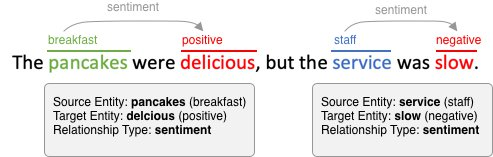

Using [ABSA Platform](https://huggingface.co/spaces/yangheng/PyABSA) you can perform Aspect-based sentiment analysis.

Try it with the following sentence:
>'I like Peter but I don't like Robert'.


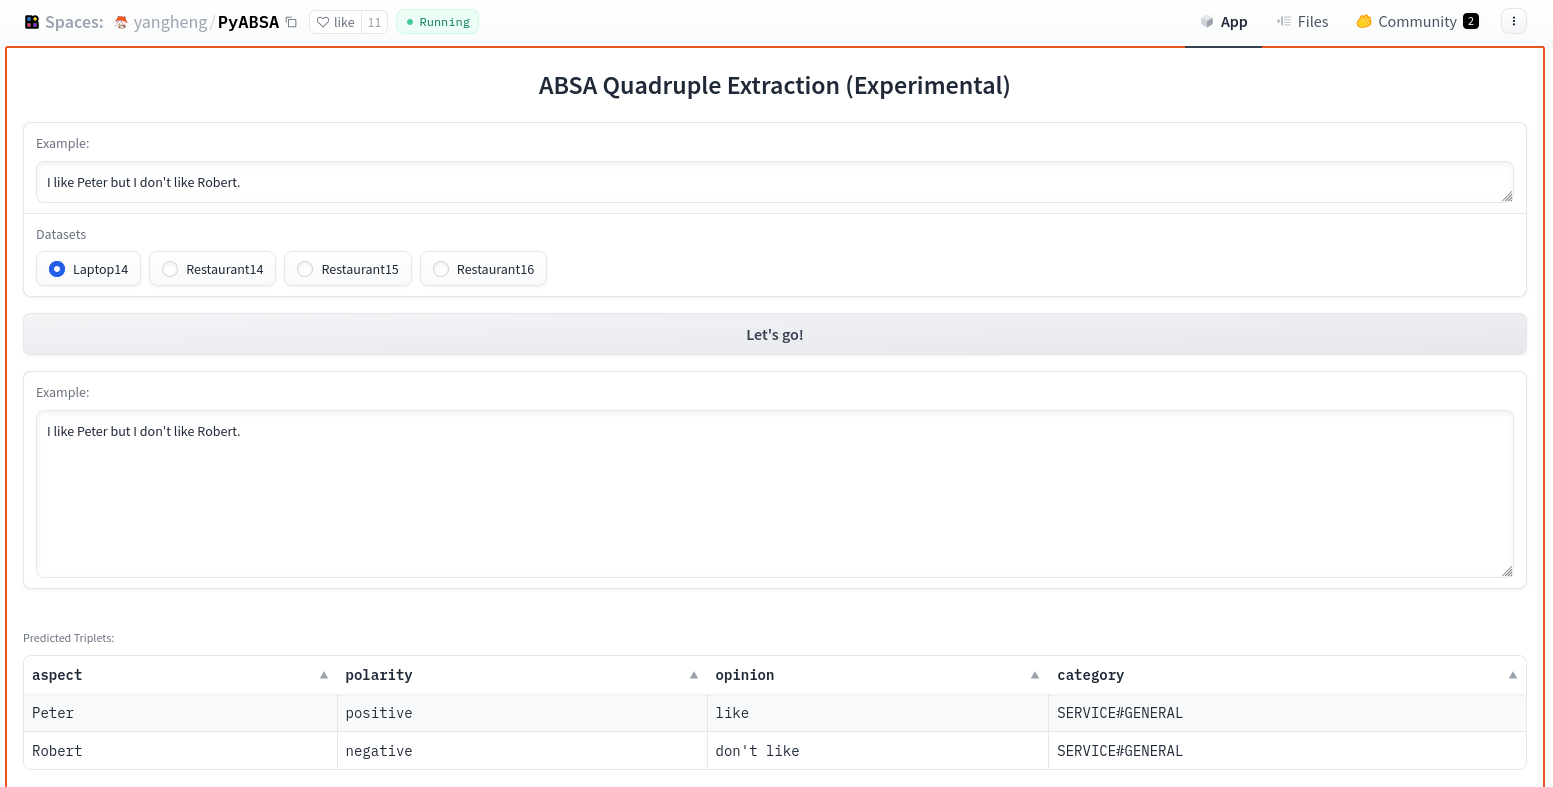

### **Multilinguality: challenges of working beyond English language**

This a [bert-base-multilingual-uncased model](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment) finetuned for sentiment analysis on product reviews in six languages:

* **English**
* **Dutch**
* **German**
* **French**
* **Spanish**
* **Italian**

It predicts the sentiment of the review as a number of stars between 1 (strongly negative) and 5 (strongly positive).


In [ ]:
#@title Try adding sentences in one of the languages supported by this model

import torch
from transformers import pipeline
from transformers import AutoTokenizer,AutoConfig

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
sentiment_pipeline = pipeline(model=model_name, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)

text = "Ich bin sehr zufrieden mit dem Elektrogrill. Praktisch und schnell" #@param {type:"string"}
sentiment_pipeline(text)

[{'label': '5 stars', 'score': 0.7578716278076172}]

# 2. Explainability: what's behind the black-boxes?

Explainable AI is a set of tools and frameworks to help you understand and interpret predictions made by your machine learning models.

> For this exercise, we will use [LIME](https://github.com/marcotcr/lime).

In [ ]:
#@title Try and see how models can be explained
text = "I HATE Mondays! I missed the bus and forgot my lunch..." #@param {type:"string"}
# Import vader model and LIME for text
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from lime.lime_text import LimeTextExplainer

# Import numpy for formatting
import numpy as np

# Declare a function that can score multiple texts
def predict_proba(self, texts):

  # Initialize empty list
  ret = []

  # Iterate over texts
  for text in texts:

    # Get negative score
    neg = self.polarity_scores(text).get('neg')

    # Return two outputs: (neg) and (1 - neg)
    ret.append([neg, 1 - neg])

  # Return predictions
  return np.array(ret)

# Add the function as a method
SentimentIntensityAnalyzer.predict_proba = predict_proba

# Instantiate model
vader = SentimentIntensityAnalyzer()

# Instantiate explainer
explainer = LimeTextExplainer(class_names=['negative', 'not-negative'])

# Create explanation for text
explanation = explainer.explain_instance(
    text,
    vader.predict_proba,
    num_features=4
)

print(vader.polarity_scores(text))
print()
# Show explanation
explanation.show_in_notebook()


{'neg': 0.435, 'neu': 0.565, 'pos': 0.0, 'compound': -0.7861}



In [ ]:
#@title How can explainability help with complex sentences?
text = "Tessa Jowell deserves an Olympic medal in utter madness" #@param {type:"string"}
# Import vader model and LIME for text
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from lime.lime_text import LimeTextExplainer

# Import numpy for formatting
import numpy as np

# Declare a function that can score multiple texts
def predict_proba(self, texts):

  # Initialize empty list
  ret = []

  # Iterate over texts
  for text in texts:

    # Get negative score
    neg = self.polarity_scores(text).get('neg')

    # Return two outputs: (neg) and (1 - neg)
    ret.append([neg, 1 - neg])

  # Return predictions
  return np.array(ret)

# Add the function as a method
SentimentIntensityAnalyzer.predict_proba = predict_proba

# Instantiate model
vader = SentimentIntensityAnalyzer()

# Instantiate explainer
explainer = LimeTextExplainer(class_names=['negative', 'not-negative'])

# Create explanation for text
explanation = explainer.explain_instance(
    text,
    vader.predict_proba,
    num_features=4
)

print(vader.polarity_scores(text))
print()
# Show explanation
explanation.show_in_notebook()
